In [1]:

import numpy as np

import os
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/datasets/

/content/drive/MyDrive/datasets


In [4]:
cd  beer_data

/content/drive/MyDrive/datasets/beer_data


**Reading a file using Modin Ray**

In [5]:
!pip install pandas==2.2.2
!pip install modin[ray]==0.30.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 MB 9.3 MB/s eta 0:00:00


In [6]:
import ray
import modin.pandas as pd_m
import time  # Importing the time module to use time.time()

# Printing versions of the used libraries
print("Pandas version:", pd_m.__version__)



Pandas version: 0.30.0


In [7]:

import os

In [8]:
results_loading = []

In [9]:
# Shutting down any existing Ray sessions to clean up previous states
 # Initializing Ray to handle parallel tasks



In [10]:
ray.shutdown()
ray.init(num_cpus=2)
# Loading the dataset
start_time = time.time()
df = pd_m.read_csv("brewery_data.csv")
# Starting a timer to measure data loading time

# Calculating and printing the time taken to load the data
elapsed_time = time.time() - start_time
print("--- %s seconds ---" % elapsed_time)

# Adding the loading time to the results list
results_loading.append({"lib": "Modin with Ray", "time": elapsed_time})

# Displaying the first few rows of the dataframe to verify successful loading
print(df.head())

ray.shutdown()


2024-06-09 16:28:44,367	INFO worker.py:1753 -- Started a local Ray instance.


--- 109.15634894371033 seconds ---
   Batch_ID            Brew_Date  Beer_Style   SKU      Location  \
0   7870796  2020-01-01 00:00:19  Wheat Beer  Kegs    Whitefield   
1   9810411  2020-01-01 00:00:31        Sour  Kegs    Whitefield   
2   2623342  2020-01-01 00:00:40  Wheat Beer  Kegs   Malleswaram   
3   8114651  2020-01-01 00:01:37         Ale  Kegs   Rajajinagar   
4   4579587  2020-01-01 00:01:43       Stout  Cans  Marathahalli   

   Fermentation_Time  Temperature  pH_Level   Gravity  Alcohol_Content  \
0                 16    24.204251  5.289845  1.039504         5.370842   
1                 13    18.086763  5.275643  1.059819         5.096053   
2                 12    15.539333  4.778016  1.037476         4.824737   
3                 17    16.418489  5.345261  1.052431         5.509243   
4                 18    19.144908  4.861854  1.054296         5.133625   

   Bitterness  Color Ingredient_Ratio  Volume_Produced   Total_Sales  \
0          20      5      1:0.32:0.16  

In [11]:

print(results_loading)

[{'lib': 'Modin with Ray', 'time': 109.15634894371033}]


In [12]:
import modin.config as modin_cfg
print("Engine used:", modin_cfg.Engine.get())

Engine used: Ray


**Reading a file using Dask**

In [13]:
import dask.dataframe as dd
# Initialize the time recording
start_time = time.time()

# Load the dataset using Dask
data2 = dd.read_csv('brewery_data.csv')

# Compute the dataframe to trigger actual computation in Dask
data2.compute()

# Calculate the elapsed time and print it
elapsed_time = time.time() - start_time
print("--- %s seconds ---" % elapsed_time)

# Append the time taken to load the data to results_loading
results_loading.append({"lib": "sec_dask", "time": elapsed_time})

--- 56.47833776473999 seconds ---


In [14]:
data2.npartitions

40

**Reading a file using Pandas**

In [15]:
!pip install --upgrade pandas

import pandas as pd

In [16]:

start_time = time.time()
%time  data = pd.read_csv('brewery_data.csv')
results_loading.append({"lib":"sec_pd","time":float("{}".format(time.time() - start_time))})
sec_pd=print("--- %s seconds ---" % (time.time() - start_time))

CPU times: user 48.6 s, sys: 8.27 s, total: 56.9 s
Wall time: 1min 8s
--- 68.6959171295166 seconds ---


In [17]:
data.head()

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630


In [18]:
data.shape

(10000000, 20)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# results_loading = [
#     {"lib": "sec_pd", "time": 96.02150058746338},
#     {'lib': 'Modin with Ray', 'time': 73.95907878875732},
#     {"lib": "sec_dask", "time": 64.78524565696716}
# ]

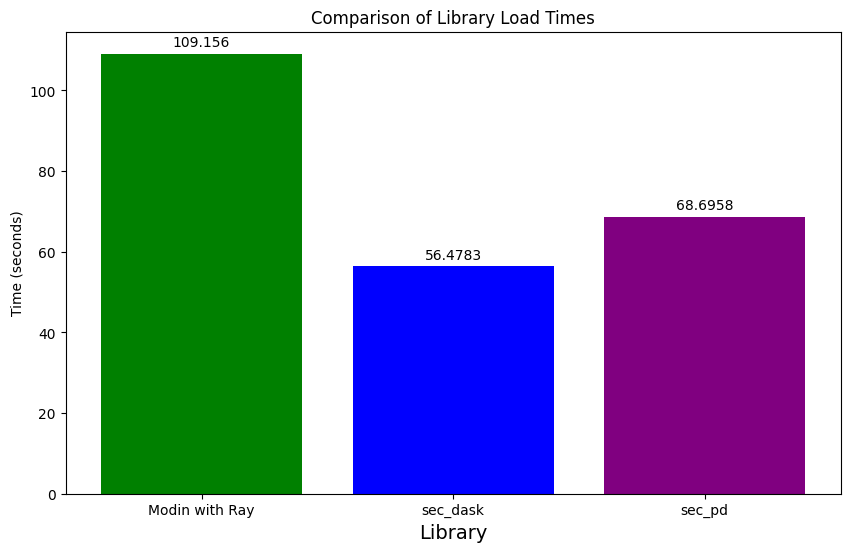

In [21]:

# Ensuring enough colors are available for the number of libraries
colors = ['green', 'blue', 'purple', 'teal', 'brown']  # Added 'brown' for safety

# Create DataFrame from the results_loading list
df = pd.DataFrame(results_loading)

# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjusts the figure size for clarity
bars = plt.bar(df['lib'], df['time'], color=colors[:len(df)])  # Use slicing to match the number of items
plt.bar_label(bars, padding=3)  # Adds labels to the bars, with padding for better visibility
plt.xlabel('Library', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=10)  # Updated label for clarity
plt.title('Comparison of Library Load Times')  # Optional: Adds a title to the plot
plt.show()

In [22]:
len(data.index)

10000000

In [23]:
len(data.columns)

20

In [24]:
# remove special character
data.columns=data.columns.str.replace('[#,@,&]','')

In [25]:
data.head()

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630


**Validation**

*create utility file*

In [26]:
import yaml
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime
import gc
import re
import utility as util

import gzip
import os

In [27]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 44.5 MB/s eta 0:00:00


In [28]:
!pip install pyyaml

In [29]:
%%writefile utility.py
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime
import gc
import re

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)

def replacer(string, char):
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string)
    return string

def col_header_val(df, table_config):
    '''
    Replace whitespaces in the column names and standardize column names.
    '''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace('[^\w]', '_', regex=True)
    df.columns = list(map(lambda x: x.strip('_'), list(df.columns)))
    df.columns = list(map(lambda x: replacer(x, '_'), list(df.columns)))
    expected_col = list(map(lambda x: x.lower(), table_config['columns']))
    expected_col.sort()
    df.columns = list(map(lambda x: x.lower(), list(df.columns)))
    df = df.reindex(sorted(df.columns), axis=1)
    if len(df.columns) == len(expected_col) and list(expected_col) == list(df.columns):
        print("Column name and column length validation passed")
        return 1
    else:
        print("Column name and column length validation failed")
        mismatched_columns_file = list(set(df.columns).difference(expected_col))
        print("Following File columns are not in the YAML file", mismatched_columns_file)
        missing_yaml_file = list(set(expected_col).difference(df.columns))
        print("Following YAML columns are not in the file uploaded", missing_yaml_file)
        logging.info(f'df columns: {df.columns}')
        logging.info(f'expected columns: {expected_col}')
        return 0

Overwriting utility.py


*write YAML file*

In [30]:
%%writefile file.yaml
file_type: csv
dataset_name: brewery_data
file_name: brewery_data
table_name: brewery_records
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns:
   - batch_id
   - brew_date
   - beer_style
   - sku
   - location
   - fermentation_time
   - temperature
   - ph_level
   - gravity
   - alcohol_content
   - bitterness
   - color
   - ingredient_ratio
   - volume_produced
   - total_sales
   - quality_score
   - brewhouse_efficiency
   - loss_during_brewing
   - loss_during_fermentation
   - loss_during_bottling_kegging

Overwriting file.yaml


In [31]:
!pip install python-utils

In [32]:
# Reading config file
import utility as util
config_data = util.read_config_file("file.yaml")
config_data

{'file_type': 'csv',
 'dataset_name': 'brewery_data',
 'file_name': 'brewery_data',
 'table_name': 'brewery_records',
 'inbound_delimiter': ',',
 'outbound_delimiter': '|',
 'skip_leading_rows': 1,
 'columns': ['batch_id',
  'brew_date',
  'beer_style',
  'sku',
  'location',
  'fermentation_time',
  'temperature',
  'ph_level',
  'gravity',
  'alcohol_content',
  'bitterness',
  'color',
  'ingredient_ratio',
  'volume_produced',
  'total_sales',
  'quality_score',
  'brewhouse_efficiency',
  'loss_during_brewing',
  'loss_during_fermentation',
  'loss_during_bottling_kegging']}

In [33]:
config_data['file_type']

'csv'

In [34]:
config_data['inbound_delimiter']

','

In [35]:
# # Read the dataset based on the configuration settings
# df = pd.read_csv(config_data['file_name'] + f".{config_data['file_type']}", delimiter=config_data['inbound_delimiter'])

# # # Validate column names to ensure they match the expected columns from the YAML configuration
# # if set(df.columns) == set(config_data['columns']):
# #     print("Column name and length validation passed")
# # else:
# #     print("Column name and length validation failed")
# #     print("Expected columns:", config_data['columns'])
# #     print("Found columns:", df.columns)

In [36]:
import pandas as pd
import utility as util
import gzip
import os

# Load configuration from YAML file using a utility function
config_data = util.read_config_file("file.yaml")

# Read the dataset based on the configuration settings
source_file = config_data['file_name'] + f".{config_data['file_type']}"
df = pd.read_csv(source_file, delimiter=config_data['inbound_delimiter'])

# Validate column headers
validation_result = util.col_header_val(df, config_data)

if validation_result == 1:
    print("Column validation passed.")

    # Write the DataFrame to a new pipe-separated gzip file
    output_file = config_data['file_name'] + ".gz"
    with gzip.open(output_file, 'wt') as gz_file:
        df.to_csv(gz_file, sep=config_data['outbound_delimiter'], index=False)

    # Print a summary of the data file
    print("Total number of rows:", df.shape[0])
    print("Total number of columns:", df.shape[1])
    print("File size:", os.path.getsize(output_file), "bytes")
else:
    print("Column validation failed. Please check the column names and try again.")


Column name and column length validation passed
Column validation passed.
Total number of rows: 10000000
Total number of columns: 20
File size: 1126716750 bytes


In [37]:
# # Write the DataFrame to a new pipe-separated gzip file
# output_file = config_data['file_name'] + ".gz"
# with gzip.open(output_file, 'wt') as gz_file:
#     df.to_csv(gz_file, sep=config_data['outbound_delimiter'], index=False)

In [38]:
# # Print a summary of the data file
# print("Total number of rows:", df.shape[0])
# print("Total number of columns:", df.shape[1])
# print("File size:", os.path.getsize(output_file), "bytes")

In [39]:
print("columns of files are:" ,df.columns)
print("columns of YAML are:" ,config_data['columns'])

columns of files are: Index(['batch_id', 'brew_date', 'beer_style', 'sku', 'location',
       'fermentation_time', 'temperature', 'ph_level', 'gravity',
       'alcohol_content', 'bitterness', 'color', 'ingredient_ratio',
       'volume_produced', 'total_sales', 'quality_score',
       'brewhouse_efficiency', 'loss_during_brewing',
       'loss_during_fermentation', 'loss_during_bottling_kegging'],
      dtype='object')
columns of YAML are: ['batch_id', 'brew_date', 'beer_style', 'sku', 'location', 'fermentation_time', 'temperature', 'ph_level', 'gravity', 'alcohol_content', 'bitterness', 'color', 'ingredient_ratio', 'volume_produced', 'total_sales', 'quality_score', 'brewhouse_efficiency', 'loss_during_brewing', 'loss_during_fermentation', 'loss_during_bottling_kegging']
